In [ ]:
!pip install rdkit
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Draw, PandasTools, Descriptors, Descriptors3D, rdMolDescriptors, Scaffolds
from rdkit.Chem.Scaffolds.MurckoScaffold import GetScaffoldForMol
PandasTools.RenderImagesInAllDataFrames(images = True) # to molecules visualization
from rdkit.Chem.Draw import IPythonConsole
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 11.9 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
DB = pd.read_csv("/content/drive/MyDrive/antivirals_machine_learning/Notebooks/scaffolds_actives_05_11_24/datasets/drugbank_descriptors_1.txt")
HRV = pd.read_csv("/content/drive/MyDrive/antivirals_machine_learning/Notebooks/scaffolds_actives_05_11_24/datasets/HRV_Protease_05_11_24.csv")
IAV_M2 = pd.read_csv("/content/drive/MyDrive/antivirals_machine_learning/Notebooks/scaffolds_actives_05_11_24/datasets/IAV_M2 proton channel_05_11_24.csv")
IAV_Neu = pd.read_csv("/content/drive/MyDrive/antivirals_machine_learning/Notebooks/scaffolds_actives_05_11_24/datasets/IAV_Neuraminidase_05_11_24.csv")
IAV_Poly = pd.read_csv("/content/drive/MyDrive/antivirals_machine_learning/Notebooks/scaffolds_actives_05_11_24/datasets/IAV_Polymerase (PA)_05_11_24.csv")
IBV_Neu = pd.read_csv("/content/drive/MyDrive/antivirals_machine_learning/Notebooks/scaffolds_actives_05_11_24/datasets/IBV_Neuraminidase_05_11_24.csv")
SARSCOV2 = pd.read_csv("/content/drive/MyDrive/antivirals_machine_learning/Notebooks/scaffolds_actives_05_11_24/datasets/SARS-CoV-2_Mpro_05_11_24.csv")
SARSCOV = pd.read_csv("/content/drive/MyDrive/antivirals_machine_learning/Notebooks/scaffolds_actives_05_11_24/datasets/SARS-CoV_Mpro_05_11_24.csv")

In [ ]:
print(DB.columns)
print(HRV.columns)
print(IAV_M2.columns)
print(IAV_Neu.columns)
print(IAV_Poly.columns)
print(IBV_Neu.columns)
print(SARSCOV2.columns)
print(SARSCOV.columns)

Index(['ID', 'SMILES', 'DATASET', 'HBA', 'HBD', 'LogP', 'TPSA', 'MW', 'CSP3',
       'HEAVY', 'RING', 'HETATOMS', 'ROTBONDS', 'CARBOALICYCLIC',
       'HETEROALICYCLIC', 'CARBOAROMATIC', 'HETEROAROMATIC', 'AROMATIC',
       'a_acid', 'a_aro', 'a_base', 'a_nBr', 'a_nCl', 'a_nF', 'a_nI', 'a_nN',
       'a_nO', 'b_rotR', 'chiral'],
      dtype='object')
Index(['molecule_chembl_id', 'canonical_smiles_std', 'unique_target',
       'activity'],
      dtype='object')
Index(['molecule_chembl_id', 'canonical_smiles_std', 'unique_target',
       'activity'],
      dtype='object')
Index(['molecule_chembl_id', 'canonical_smiles_std', 'unique_target',
       'activity'],
      dtype='object')
Index(['molecule_chembl_id', 'canonical_smiles_std', 'unique_target',
       'activity'],
      dtype='object')
Index(['molecule_chembl_id', 'canonical_smiles_std', 'unique_target',
       'activity'],
      dtype='object')
Index(['molecule_chembl_id', 'canonical_smiles_std', 'unique_target',
       'activity'

In [ ]:
DB = DB[['ID', "SMILES"]]
HRV = HRV[['molecule_chembl_id', "canonical_smiles_std"]]
IAV_M2 = IAV_M2[['molecule_chembl_id', "canonical_smiles_std"]]
IAV_Neu = IAV_Neu[['molecule_chembl_id', "canonical_smiles_std"]]
IAV_Poly = IAV_Poly[['molecule_chembl_id', "canonical_smiles_std"]]
IBV_Neu = IBV_Neu[['molecule_chembl_id', "canonical_smiles_std"]]
SARSCOV2 = SARSCOV2[['molecule_chembl_id', "canonical_smiles_std"]]
SARSCOV = SARSCOV[['molecule_chembl_id', "canonical_smiles_std"]]

In [ ]:
DB.columns = ['molecule_chembl_id', 'canonical_smiles_std']
HRV.columns = ['molecule_chembl_id', 'canonical_smiles_std']
IAV_M2.columns = ['molecule_chembl_id', 'canonical_smiles_std']
IAV_Neu.columns = ['molecule_chembl_id', 'canonical_smiles_std']
IAV_Poly.columns = ['molecule_chembl_id', 'canonical_smiles_std']
IBV_Neu.columns = ['molecule_chembl_id', 'canonical_smiles_std']
SARSCOV2.columns = ['molecule_chembl_id', 'canonical_smiles_std']
SARSCOV.columns = ['molecule_chembl_id', 'canonical_smiles_std']

In [ ]:
# Specify the dataset each compound belongs to
DB['DATASET'] = 'DrugBank'
HRV['DATASET'] = 'HRV_Protease'
IAV_M2['DATASET'] = 'IAV_M2 proton channel'
IAV_Neu['DATASET'] = 'IAV_Neuraminidase'
IAV_Poly['DATASET'] = 'IAV_Polymerase (PA)'
IBV_Neu['DATASET'] = 'IBV_Neuraminidase'
SARSCOV2['DATASET'] = 'SARS-CoV-2_Mpro'
SARSCOV['DATASET'] = 'SARs-CoV_Mpro'

In [ ]:
DB.dropna()

,molecule_chembl_id,canonical_smiles_std,DATASET
0,DB09296,O=C(OC)NC(C(=O)N1C(C(=O)Nc2ccc([C@]3N(c4ccc(C(C)(C)C)cc4)[C@](c4ccc(NC(=O)C5N(C(=O)C(NC(=O)OC)C(C)C)CCC5)cc4)CC3)cc2)CCC1)C(C)C,DrugBank
1,DB11574,O=C(OC)N[C@](C(=O)N1[C@](c2[nH]cc(-c3cc4c(n5[C@](c6ccccc6)Oc6c(-c5c4)ccc(-c4nc(C5N(C(=O)C(NC(=O)OC)C(C)C)CCC5)[nH]c4)c6)cc3)n2)CCC1)C(C)C,DrugBank
2,DB12020,FC(F)(F)c1ccc(C(=O)Nn2c(O)c3c(c2O)[C@@]2C=C[C@]3[C@@]3[C@]2C3)cc1,DrugBank
3,DB08934,[P@@](=O)(OC[C@@]1[C@@](O)[C@](F)(C)[C@](N2C(=O)NC(=O)C=C2)O1)(Oc1ccccc1)NC(C(=O)OC(C)C)C,DrugBank
4,DB09027,FC1(F)c2c(-c3c1cc(-c1cc4nc(C5N(C(=O)C(NC(=O)OC)C(C)C)[C@]6C[C@@]5CC6)[nH]c4cc1)cc3)ccc(-c1nc(C3N(C(=O)[C@@](NC(=O)OC)C(C)C)CC4(C3)CC4)[nH]c1)c2,DrugBank
...,...,...,...
87,DB00709,O=C1N([C@]2O[C@@](CO)SC2)C=CC(=N)N1,DrugBank
88,DB00705,S(=O)(=O)(Nc1cc2c([nH]c(C(=O)N3CCN(c4c(NC(C)C)cccn4)CC3)c2)cc1)C,DrugBank
89,DB08864,N#CC=Cc1cc(C)c(N=C2NC(=Nc3ccc(C#N)cc3)NC=C2)c(C)c1,DrugBank
90,DB03206,OC[C@@]1[C@@](O)[C@](O)[C@@](O)CN1,DrugBank


In [ ]:
data = pd.concat([DB, HRV, IAV_M2, IAV_Neu, IAV_Poly, IBV_Neu, SARSCOV2, SARSCOV], ignore_index = True)

In [ ]:
data.shape

(2202, 3)

In [ ]:
# Delete nan and null values
data = data.dropna()

In [ ]:
data.shape

(2202, 3)

,molecule_chembl_id,canonical_smiles_std,DATASET,MOL,SCAFFOLD,SCA_MOL
0,DB09296,O=C(OC)NC(C(=O)N1C(C(=O)Nc2ccc([C@]3N(c4ccc(C(C)(C)C)cc4)[C@](c4ccc(NC(=O)C5N(C(=O)C(NC(=O)OC)C(C)C)CCC5)cc4)CC3)cc2)CCC1)C(C)C,DrugBank,,O=C(Nc1ccc([C@]2CC[C@](c3ccc(NC(=O)C4CCCN4)cc3)N2c2ccccc2)cc1)C1CCCN1,
1,DB11574,O=C(OC)N[C@](C(=O)N1[C@](c2[nH]cc(-c3cc4c(n5[C@](c6ccccc6)Oc6c(-c5c4)ccc(-c4nc(C5N(C(=O)C(NC(=O)OC)C(C)C)CCC5)[nH]c4)c6)cc3)n2)CCC1)C(C)C,DrugBank,,c1ccc([C]2Oc3cc(-c4c[nH]c(C5CCCN5)n4)ccc3-c3cc4cc(-c5c[nH]c([C]6CCCN6)n5)ccc4n32)cc1,
2,DB12020,FC(F)(F)c1ccc(C(=O)Nn2c(O)c3c(c2O)[C@@]2C=C[C@]3[C@@]3[C@]2C3)cc1,DrugBank,,O=C(Nn1cc2c(c1)[C]1C=C[C]2[C]2C[C]21)c1ccccc1,
3,DB08934,[P@@](=O)(OC[C@@]1[C@@](O)[C@](F)(C)[C@](N2C(=O)NC(=O)C=C2)O1)(Oc1ccccc1)NC(C(=O)OC(C)C)C,DrugBank,,O=c1ccn([C@]2C[CH][C@@](CO[PH](=O)Oc3ccccc3)O2)c(=O)[nH]1,
4,DB09027,FC1(F)c2c(-c3c1cc(-c1cc4nc(C5N(C(=O)C(NC(=O)OC)C(C)C)[C@]6C[C@@]5CC6)[nH]c4cc1)cc3)ccc(-c1nc(C3N(C(=O)[C@@](NC(=O)OC)C(C)C)CC4(C3)CC4)[nH]c1)c2,DrugBank,,c1cc2c(cc1-c1ccc3[nH]c(C4N[C]5CC[C]4C5)nc3c1)Cc1cc(-c3c[nH]c(C4CC5(CC5)CN4)n3)ccc1-2,
...,...,...,...,...,...,...
2197,CHEMBL427404,Cc1noc(NC(=O)c2ccc(-c3cc(C(F)(F)F)nn3C)s2)c1[N+](=O)[O-],SARs-CoV_Mpro,,O=C(Nc1ccno1)c1ccc(-c2ccn[nH]2)s1,
2198,CHEMBL4214471,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O)CC1)C(=O)N[C@H](C=O)C[C@@H]1CCNC1=O,SARs-CoV_Mpro,,O=C(CNC(=O)OC1(Cc2ccccc2)CCNCC1)NCC[C@@H]1CCNC1=O,
2199,CHEMBL4214066,CC(C)C[C@H](NC(=O)OC1CCN(C(=O)OC(C)(C)C)CC1)C(=O)N[C@H](C=O)C[C@@H]1CCNC1=O,SARs-CoV_Mpro,,O=C(CNC(=O)OC1CCNCC1)NCC[C@@H]1CCNC1=O,
2200,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]2CCNC2=O)C(O)S(=O)(=O)[O-])CCN(C(=O)OC(C)(C)C)CC1,SARs-CoV_Mpro,,O=C(CNC(=O)OC1CCNCC1)NCC[C@@H]1CCNC1=O,

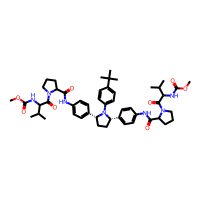
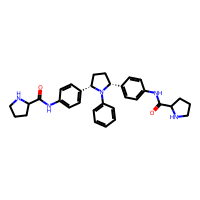
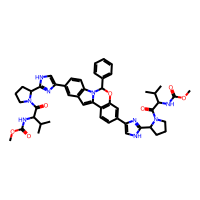
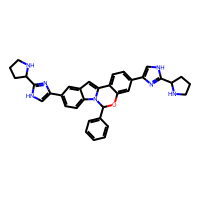
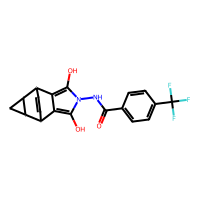
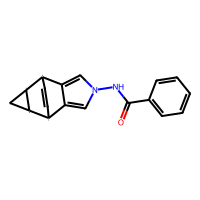
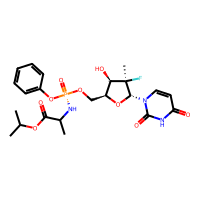
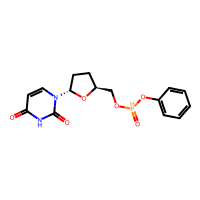
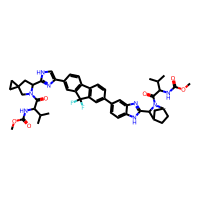
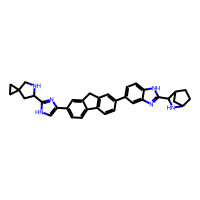
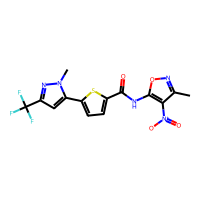
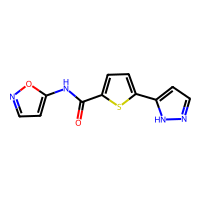
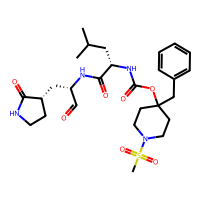
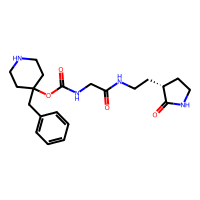
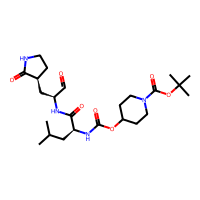
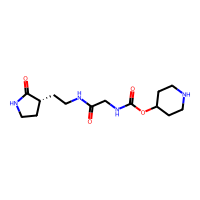
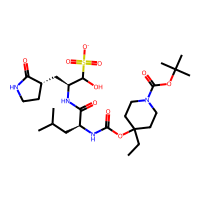
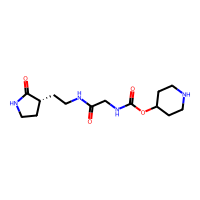
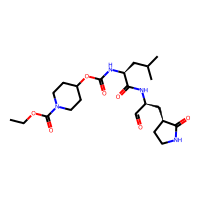
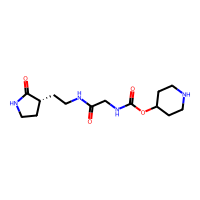

In [ ]:
PandasTools.AddMoleculeColumnToFrame(data, smilesCol="canonical_smiles_std",molCol='MOL')
PandasTools.AddMurckoToFrame(data, molCol='MOL', MurckoCol='SCAFFOLD')
PandasTools.AddMoleculeColumnToFrame(data, smilesCol="SCAFFOLD",molCol='SCA_MOL')
data

In [ ]:
# original databases are saved individually with their correspondant descriptors
DB = data[data["DATASET"] == str('DrugBank')]
HRV = data[data["DATASET"] == str('HRV_Protease')]
IAV_M2 = data[data["DATASET"] == str('IAV_M2 proton channel')]
IAV_Neu = data[data["DATASET"] == str('IAV_Neuraminidase')]
IAV_Poly = data[data["DATASET"] == str('IAV_Polymerase (PA)')]
IBV_Neu = data[data["DATASET"] == str('IBV_Neuraminidase')]
SARSCOV2 = data[data["DATASET"] == str('SARS-CoV-2_Mpro')]
SARSCOV = data[data["DATASET"] == str('SARs-CoV_Mpro')]

In [ ]:
DB.to_csv('DB_scaffolds.csv', index = False)
HRV.to_csv('HRV_scaffolds.csv', index = False)
IAV_M2.to_csv('IAV_M2_scaffolds.csv', index = False)
IAV_Neu.to_csv('IAV_Neu_scaffolds.csv', index = False)
IAV_Poly.to_csv('IAV_Poly_scaffolds.csv', index = False)
IBV_Neu.to_csv('IBV_Neu_scaffolds.csv', index = False)
SARSCOV2.to_csv('SARSCOV2_scaffolds.csv', index = False)
SARSCOV.to_csv('SARSCOV_scaffolds.csv', index = False)

In [ ]:
freq_DB = DB.groupby(['SCAFFOLD']).size()
print(f'DrugBank data set had the next {freq_DB.shape[0]} different entries:', freq_DB.sort_values(ascending=False))

freq_HRV = HRV.groupby(['SCAFFOLD']).size()
print(f'HRV_Protease data set had the next {freq_HRV.shape[0]} different entries:', freq_HRV.sort_values(ascending=False))
freq_IAV_M2 = IAV_M2.groupby(['SCAFFOLD']).size()
print(f'IAV_M2 proton channel data set had the next {freq_IAV_M2.shape[0]} different entries:', freq_IAV_M2.sort_values(ascending=False))
freq_IAV_Neu = IAV_Neu.groupby(['SCAFFOLD']).size()
print(f'IAV_Neuraminidase data set had the next {freq_IAV_Neu.shape[0]} different entries:', freq_IAV_Neu.sort_values(ascending=False))
freq_IAV_Poly = IAV_Poly.groupby(['SCAFFOLD']).size()
print(f'IAV_Polymerase (PA) data set had the next {freq_IAV_Poly.shape[0]} different entries:', freq_IAV_Poly.sort_values(ascending=False))
freq_IBV_Neu = IBV_Neu.groupby(['SCAFFOLD']).size()
print(f'IBV_Neuraminidase data set had the next {freq_IBV_Neu.shape[0]} different entries:', freq_IBV_Neu.sort_values(ascending=False))
freq_SARSCOV2 = SARSCOV2.groupby(['SCAFFOLD']).size()
print(f'SARS-CoV-2_Mpro data set had the next {freq_SARSCOV2.shape[0]} different entries:', freq_SARSCOV2.sort_values(ascending=False))
freq_SARSCOV = SARSCOV.groupby(['SCAFFOLD']).size()
print(f'SARs-CoV_Mpro data set had the next {freq_SARSCOV.shape[0]} different entries:', freq_SARSCOV.sort_values(ascending=False))

freq_data = data.groupby(['SCAFFOLD']).size()
print(f'"data" data set had the next {freq_data.shape[0]} different entries:', freq_data.sort_values(ascending=False))

DrugBank data set had the next 76 different entries: SCAFFOLD
O=c1ccn([C]2C[CH][CH]O2)c(=O)[nH]1                                                             6
N=c1[nH]c(=O)c2nc[nH]c2[nH]1                                                                   4
                                                                                               2
N=c1cc[nH]c(=O)[nH]1                                                                           2
[CH]1[CH][CH]NC[CH]1                                                                           2
                                                                                              ..
O=C(Nc1ccc([C@]2CC[C@](c3ccc(NC(=O)C4CCCN4)cc3)N2c2ccccc2)cc1)C1CCCN1                          1
N=c1[nH]c2ccccc2c2[nH]cnc12                                                                    1
O=C(Nn1cc2c(c1)[C]1C=C[C]2[C]2C[C]21)c1ccccc1                                                  1
O=C([CH]c1ccccc1)N1C[CH]CC1c1nc(-c2ccc3c(c2)COc2cc4c(ccc5[nH]c(C6

In [ ]:
DB_sca = pd.DataFrame(freq_DB, columns = ['AMOUNT'])
DB_sca = DB_sca.sort_values(by = 'AMOUNT', ascending = False)
DB_sca = DB_sca.reset_index(level = None, drop = False)
DB_sca.at[0, 'SCAFFOLD'] = 'ACYCLIC' # this is needed when the data set present linear molecules (without scaffold). Select the raw which corresponds to acyclic 'scaffold'
print('DrugBank:', DB_sca.shape, DB_sca.columns)

HRV_sca = pd.DataFrame(freq_HRV, columns = ['AMOUNT'])
HRV_sca = HRV_sca.sort_values(by = 'AMOUNT', ascending = False)
HRV_sca = HRV_sca.reset_index(level = None, drop = False)
HRV_sca.at[0, 'SCAFFOLD'] = 'ACYCLIC' # this is needed when the data set present linear molecules (without scaffold)
print('HRV_Protease:', HRV_sca.shape, HRV_sca.columns)

IAV_M2_sca = pd.DataFrame(freq_IAV_M2, columns = ['AMOUNT'])
IAV_M2_sca = IAV_M2_sca.sort_values(by = 'AMOUNT', ascending = False)
IAV_M2_sca = IAV_M2_sca.reset_index(level = None, drop = False)
IAV_M2_sca.at[0, 'SCAFFOLD'] = 'ACYCLIC' # this is needed when the data set present linear molecules (without scaffold)
print('IAV_M2 proton channel:', IAV_M2_sca.shape, IAV_M2_sca.columns)

IAV_Neu_sca = pd.DataFrame(freq_IAV_Neu, columns = ['AMOUNT'])
IAV_Neu_sca = IAV_Neu_sca.sort_values(by = 'AMOUNT', ascending = False)
IAV_Neu_sca = IAV_Neu_sca.reset_index(level = None, drop = False)
IAV_Neu_sca.at[0, 'SCAFFOLD'] = 'ACYCLIC' # this is needed when the data set present linear molecules (without scaffold)
print('IAV_Neuraminidase:', IAV_Neu_sca.shape, IAV_Neu_sca.columns)

IAV_Poly_sca = pd.DataFrame(freq_IAV_Poly, columns = ['AMOUNT'])
IAV_Poly_sca = IAV_Poly_sca.sort_values(by = 'AMOUNT', ascending = False)
IAV_Poly_sca = IAV_Poly_sca.reset_index(level = None, drop = False)
IAV_Poly_sca.at[0, 'SCAFFOLD'] = 'ACYCLIC' # this is needed when the data set present linear molecules (without scaffold)
print('IAV_Polymerase (PA):', IAV_Poly_sca.shape, IAV_Poly_sca.columns)

IBV_Neu_sca = pd.DataFrame(freq_IBV_Neu, columns = ['AMOUNT'])
IBV_Neu_sca = IBV_Neu_sca.sort_values(by = 'AMOUNT', ascending = False)
IBV_Neu_sca = IBV_Neu_sca.reset_index(level = None, drop = False)
IBV_Neu_sca.at[0, 'SCAFFOLD'] = 'ACYCLIC' # this is needed when the data set present linear molecules (without scaffold)
print('IBV_Neuraminidase:', IBV_Neu_sca.shape, IBV_Neu_sca.columns)

SARSCOV2_sca = pd.DataFrame(freq_SARSCOV2, columns = ['AMOUNT'])
SARSCOV2_sca = SARSCOV2_sca.sort_values(by = 'AMOUNT', ascending = False)
SARSCOV2_sca = SARSCOV2_sca.reset_index(level = None, drop = False)
SARSCOV2_sca.at[0, 'SCAFFOLD'] = 'ACYCLIC' # this is needed when the data set present linear molecules (without scaffold)
print('SARS-CoV-2_Mpro:', SARSCOV2_sca.shape, SARSCOV2_sca.columns)

SARSCOV_sca = pd.DataFrame(freq_SARSCOV, columns = ['AMOUNT'])
SARSCOV_sca = SARSCOV_sca.sort_values(by = 'AMOUNT', ascending = False)
SARSCOV_sca = SARSCOV_sca.reset_index(level = None, drop = False)
SARSCOV_sca.at[0, 'SCAFFOLD'] = 'ACYCLIC' # this is needed when the data set present linear molecules (without scaffold)
print('SARs-CoV_Mpro:', SARSCOV_sca.shape, SARSCOV_sca.columns)

data_sca = pd.DataFrame(freq_data, columns = ['AMOUNT'])
data_sca = data_sca.sort_values(by = 'AMOUNT', ascending = False)
data_sca = data_sca.reset_index(level = None, drop = False)
data_sca.at[0, 'SCAFFOLD'] = 'ACYCLIC' # this is needed when the data set present linear molecules (without scaffold)
print('DATA:', data_sca.shape, data_sca.columns, data_sca)

DrugBank: (76, 2) Index(['SCAFFOLD', 'AMOUNT'], dtype='object')
HRV_Protease: (141, 2) Index(['SCAFFOLD', 'AMOUNT'], dtype='object')
IAV_M2 proton channel: (30, 2) Index(['SCAFFOLD', 'AMOUNT'], dtype='object')
IAV_Neuraminidase: (212, 2) Index(['SCAFFOLD', 'AMOUNT'], dtype='object')
IAV_Polymerase (PA): (72, 2) Index(['SCAFFOLD', 'AMOUNT'], dtype='object')
IBV_Neuraminidase: (34, 2) Index(['SCAFFOLD', 'AMOUNT'], dtype='object')
SARS-CoV-2_Mpro: (340, 2) Index(['SCAFFOLD', 'AMOUNT'], dtype='object')
SARs-CoV_Mpro: (49, 2) Index(['SCAFFOLD', 'AMOUNT'], dtype='object')
DATA: (894, 2) Index(['SCAFFOLD', 'AMOUNT'], dtype='object')                                                               SCAFFOLD  AMOUNT
0                                                              ACYCLIC     142
1                                                              C1CCNC1      77
2                                                            C1=COCCC1      72
3                                                 

In [ ]:
print(f"The total amount of valid structures for scaffold computation in DB is: {sum(DB_sca['AMOUNT'])}")
print(f"The total amount of valid structures for scaffold computation in HRV_Protease is: {sum(HRV_sca['AMOUNT'])}")
print(f"The total amount of valid structures for scaffold computation in IAV_M2 proton channel is: {sum(IAV_M2_sca['AMOUNT'])}")
print(f"The total amount of valid structures for scaffold computation in IAV_Neuraminidase is: {sum(IAV_Neu_sca['AMOUNT'])}")
print(f"The total amount of valid structures for scaffold computation in IAV_Polymerase (PA) is: {sum(IAV_Poly_sca['AMOUNT'])}")
print(f"The total amount of valid structures for scaffold computation in IBV_Neuraminidase is: {sum(IBV_Neu_sca['AMOUNT'])}")
print(f"The total amount of valid structures for scaffold computation in SARS-CoV-2_Mpro is: {sum(SARSCOV2_sca['AMOUNT'])}")
print(f"The total amount of valid structures for scaffold computation in SARS-CoV_Mpro is: {sum(SARSCOV_sca['AMOUNT'])}")
print(f"The total amount of valid structures for scaffold computation in 'data' data set is: {sum(data_sca['AMOUNT'])}")

HRV_sca

The total amount of valid structures for scaffold computation in DB is: 92
The total amount of valid structures for scaffold computation in HRV_Protease is: 298
The total amount of valid structures for scaffold computation in IAV_M2 proton channel is: 68
The total amount of valid structures for scaffold computation in IAV_Neuraminidase is: 733
The total amount of valid structures for scaffold computation in IAV_Polymerase (PA) is: 151
The total amount of valid structures for scaffold computation in IBV_Neuraminidase is: 132
The total amount of valid structures for scaffold computation in SARS-CoV-2_Mpro is: 651
The total amount of valid structures for scaffold computation in SARS-CoV_Mpro is: 77
The total amount of valid structures for scaffold computation in 'data' data set is: 2202


,SCAFFOLD,AMOUNT
0,ACYCLIC,20
1,O=C1C[C@H](Cc2ccccc2)N1C(=O)NCc1ccccc1,16
2,O=C(CNC(=O)OCc1ccccc1)NCCc1ccccc1,14
3,c1ccccc1,14
4,O=C1C=CC(=O)c2ccccc21,8
...,...,...
136,O=C(CNC(=O)c1ccon1)C[C@@H](Cc1ccccc1)C(=O)NCC[C@@H]1CCNC1=O,1
137,O=C(CNC(=O)c1ccc2ccccc2n1)N[C@H](CCN1CCC(OCc2ccncc2)CC1)Cc1ccccc1,1
138,O=C(CNC(=O)[C@H]1NC[C@@H]2CCC[C@@H]21)C(=O)Nc1ccccc1,1
139,O=C(CNC(=O)[C@H](Cc1ccccc1)NC[C@H](Cc1ccccc1)NC(=O)[C@H](Cc1c[nH]cn1)NC(=O)[C@@H]1CCCN1C(=O)[C@H]1CCCN1)NCCC1CCCCC1,1


In [ ]:
DB_sca['FREQUENCY'] = (DB_sca['AMOUNT'] / sum(DB_sca['AMOUNT'])) * 100
print(f"Total frequency in DrugBank database: {sum(DB_sca['FREQUENCY'])}, different entries: {sum(DB_sca['AMOUNT'])}, different Murcko smiles:",
      len(DB_sca['SCAFFOLD']))
HRV_sca['FREQUENCY'] = (HRV_sca['AMOUNT'] / sum(HRV_sca['AMOUNT'])) * 100
print(f"Total frequency in HRV_Protease database: {sum(HRV_sca['FREQUENCY'])}, different entries: {sum(HRV_sca['AMOUNT'])}, different Murcko smiles:",
      len(HRV_sca['SCAFFOLD']))
IAV_M2_sca['FREQUENCY'] = (IAV_M2_sca['AMOUNT'] / sum(IAV_M2_sca['AMOUNT'])) * 100
print(f"Total frequency in IAV_M2 proton channel database: {sum(IAV_M2_sca['FREQUENCY'])}, different entries: {sum(IAV_M2_sca['AMOUNT'])}, different Murcko smiles:",
      len(IAV_M2_sca['SCAFFOLD']))
IAV_Neu_sca['FREQUENCY'] = (IAV_Neu_sca['AMOUNT'] / sum(IAV_Neu_sca['AMOUNT'])) * 100
print(f"Total frequency in IAV_Neuraminidase database: {sum(IAV_Neu_sca['FREQUENCY'])}, different entries: {sum(IAV_Neu_sca['AMOUNT'])}, different Murcko smiles:",
      len(IAV_Neu_sca['SCAFFOLD']))
IAV_Poly_sca['FREQUENCY'] = (IAV_Poly_sca['AMOUNT'] / sum(IAV_Poly_sca['AMOUNT'])) * 100
print(f"Total frequency in IAV_Polymerase (PA) database: {sum(IAV_Poly_sca['FREQUENCY'])}, different entries: {sum(IAV_Poly_sca['AMOUNT'])}, different Murcko smiles:",
      len(IAV_Poly_sca['SCAFFOLD']))
IBV_Neu_sca['FREQUENCY'] = (IBV_Neu_sca['AMOUNT'] / sum(IBV_Neu_sca['AMOUNT'])) * 100
print(f"Total frequency in IBV_Neuraminidase database: {sum(IBV_Neu_sca['FREQUENCY'])}, different entries: {sum(IBV_Neu_sca['AMOUNT'])}, different Murcko smiles:",
      len(IBV_Neu_sca['SCAFFOLD']))
SARSCOV2_sca['FREQUENCY'] = (SARSCOV2_sca['AMOUNT'] / sum(SARSCOV2_sca['AMOUNT'])) * 100
print(f"Total frequency in SARS-CoV-2_Mpro database: {sum(SARSCOV2_sca['FREQUENCY'])}, different entries: {sum(SARSCOV2_sca['AMOUNT'])}, different Murcko smiles:",
      len(SARSCOV2_sca['SCAFFOLD']))
SARSCOV_sca['FREQUENCY'] = (SARSCOV_sca['AMOUNT'] / sum(SARSCOV_sca['AMOUNT'])) * 100
print(f"Total frequency in SARS-CoV_Mpro database: {sum(SARSCOV_sca['FREQUENCY'])}, different entries: {sum(SARSCOV_sca['AMOUNT'])}, different Murcko smiles:",
      len(SARSCOV_sca['SCAFFOLD']))

data_sca['FREQUENCY'] = (data_sca['AMOUNT'] / sum(data_sca['AMOUNT'])) * 100
print(f"Total frequency in 'DATA' database: {sum(data_sca['FREQUENCY'])}, different entries: {sum(data_sca['AMOUNT'])}, different Murcko smiles:",
      len(data_sca['SCAFFOLD']))

HRV_sca

Total frequency in DrugBank database: 99.9999999999999, different entries: 92, different Murcko smiles: 76
Total frequency in HRV_Protease database: 99.99999999999969, different entries: 298, different Murcko smiles: 141
Total frequency in IAV_M2 proton channel database: 99.99999999999996, different entries: 68, different Murcko smiles: 30
Total frequency in IAV_Neuraminidase database: 99.99999999999982, different entries: 733, different Murcko smiles: 212
Total frequency in IAV_Polymerase (PA) database: 99.99999999999977, different entries: 151, different Murcko smiles: 72
Total frequency in IBV_Neuraminidase database: 99.99999999999982, different entries: 132, different Murcko smiles: 34
Total frequency in SARS-CoV-2_Mpro database: 100.00000000000016, different entries: 651, different Murcko smiles: 340
Total frequency in SARS-CoV_Mpro database: 100.00000000000011, different entries: 77, different Murcko smiles: 49
Total frequency in 'DATA' database: 100.00000000000207, different ent

,SCAFFOLD,AMOUNT,FREQUENCY
0,ACYCLIC,20,6.711409
1,O=C1C[C@H](Cc2ccccc2)N1C(=O)NCc1ccccc1,16,5.369128
2,O=C(CNC(=O)OCc1ccccc1)NCCc1ccccc1,14,4.697987
3,c1ccccc1,14,4.697987
4,O=C1C=CC(=O)c2ccccc21,8,2.684564
...,...,...,...
136,O=C(CNC(=O)c1ccon1)C[C@@H](Cc1ccccc1)C(=O)NCC[C@@H]1CCNC1=O,1,0.335570
137,O=C(CNC(=O)c1ccc2ccccc2n1)N[C@H](CCN1CCC(OCc2ccncc2)CC1)Cc1ccccc1,1,0.335570
138,O=C(CNC(=O)[C@H]1NC[C@@H]2CCC[C@@H]21)C(=O)Nc1ccccc1,1,0.335570
139,O=C(CNC(=O)[C@H](Cc1ccccc1)NC[C@H](Cc1ccccc1)NC(=O)[C@H](Cc1c[nH]cn1)NC(=O)[C@@H]1CCCN1C(=O)[C@H]1CCCN1)NCCC1CCCCC1,1,0.335570


In [ ]:
# Data sets to csv
DB_sca.to_csv('DB_scaffolds_frequency_12_11_24.csv', index = False)
HRV_sca.to_csv('HRV_scaffolds_frequency_12_11_24.csv', index = False)
IAV_M2_sca.to_csv('IAV_M2_scaffolds_frequency_12_11_24.csv', index = False)
IAV_Neu_sca.to_csv('IAV_Neu_scaffolds_frequency_12_11_24.csv', index = False)
IAV_Poly_sca.to_csv('IAV_Poly_scaffolds_frequency_12_11_24.csv', index = False)
IBV_Neu_sca.to_csv('IBV_Neu_scaffolds_frequency_12_11_24.csv', index = False)
SARSCOV2_sca.to_csv('SARSCOV2_scaffolds_frequency_12_11_24.csv', index = False)
SARSCOV_sca.to_csv('SARSCOV_scaffolds_frequency_12_11_24.csv', index = False)
data_sca.to_csv('data_scaffolds_frequency_12_11_24.csv', index = False)

In [ ]:
DB_sca

,SCAFFOLD,AMOUNT,FREQUENCY
0,ACYCLIC,6,6.521739
1,N=c1[nH]c(=O)c2nc[nH]c2[nH]1,4,4.347826
2,,2,2.173913
3,N=c1cc[nH]c(=O)[nH]1,2,2.173913
4,[CH]1[CH][CH]NC[CH]1,2,2.173913
...,...,...,...
71,O=C(Nc1ccc([C@]2CC[C@](c3ccc(NC(=O)C4CCCN4)cc3)N2c2ccccc2)cc1)C1CCCN1,1,1.086957
72,N=c1[nH]c2ccccc2c2[nH]cnc12,1,1.086957
73,O=C(Nn1cc2c(c1)[C]1C=C[C]2[C]2C[C]21)c1ccccc1,1,1.086957
74,O=C([CH]c1ccccc1)N1C[CH]CC1c1nc(-c2ccc3c(c2)COc2cc4c(ccc5[nH]c(C6CC[CH]N6)nc54)cc2-3)c[nH]1,1,1.086957
